In [490]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ProgbarLogger
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [491]:
dfolder = 'data/'

In [492]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_20958/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [493]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [495]:
df = df[df['year'] >= 1989]

In [496]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [498]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 85.76270820514482%
deaths: 85.76270820514482%
state_deaths: 85.76270820514482%
nonstate_deaths: 85.76270820514482%
onesided_deaths: 85.76270820514482%
civilian_deaths: 85.76270820514482%


In [499]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [500]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
df['nonstate_deaths'].fillna(0, inplace=True)
df['onesided_deaths'].fillna(0, inplace=True)
df['civilian_deaths'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['state_deaths'].fillna(0, inplace=True)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_20958/1456559570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonstate_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_20958/1456559570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onesided_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_20958/1456559570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [502]:
df.MonthYear.dtype
df.year.dtype
df.month.dtype

dtype('int64')

In [503]:
# 'year' and 'month' columns to a datetime type
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# columns to be filled
fill_cols = [col for col in df.columns if 'count' in col]

dfs = []

# Iterate through unique 'isocode' values
for isocode in df['isocode'].unique():
    df_isocode = df[df['isocode'] == isocode].copy()

    # Create a new dataframe that covers all months between the min and max 'Date' for this isocode
    min_date = df_isocode['Date'].min()
    max_date = df_isocode['Date'].max()
    all_dates = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'), columns=['Date'])

    # merge onto the existing dataframe
    df_isocode = pd.merge(all_dates, df_isocode, on='Date', how='left')

    df_isocode['isocode'] = isocode

    # forward-fill and then fill any remaining NaNs with 0
    df_isocode[fill_cols] = df_isocode[fill_cols].ffill().fillna(0)

    # convert the 'date' back to 'year' and 'month'
    df_isocode['year'] = df_isocode['Date'].dt.year
    df_isocode['month'] = df_isocode['Date'].dt.month

    # append to list
    dfs.append(df_isocode)

# concatenate all DataFrames in the list into a final DataFrame
df_final = pd.concat(dfs)

df_final.drop(columns=['Date'], inplace=True)

# sort final dataframe by 'isocode', 'year' and 'month'
df_final.sort_values(['year', 'month', 'isocode'], inplace=True)
df_final.fillna(0)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_20958/1128609220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901.0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,198901.0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,198901.0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,202305.0,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,202305.0,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0


In [504]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

df_final['country'] = df_final['isocode'].apply(get_country_name)

In [505]:
df_final

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901.0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,198901.0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,198901.0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,United Arab Emirates,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,Argentina,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,202305.0,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
412,202305.0,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,Yemen,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0
412,202305.0,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,Zambia,0.0,0.0,0.0,0.0,0.0


Every country isocode has the correct number of months in MonthYear. No months are missing.
For every country, the months are in ascending order, meaning the data for each isocode is ordered correctly by time.


In [506]:
def check_month_year_sequence(group):
    # Create the expected sequence of months and years
    min_year, min_month = group[['year', 'month']].iloc[0] # use the first row of each group
    max_year, max_month = group[['year', 'month']].iloc[-1] # use the last row of each group

    expected_month_years = [(y, m) for y in range(min_year, max_year + 1) for m in range(1, 13)]
    
    # If there is only one year in the data, filter for months within the min and max range
    if min_year == max_year:
        expected_month_years = [my for my in expected_month_years if min_month <= my[1] <= max_month]
    else:
        # If there are multiple years, adjust for the first and last years
        expected_month_years = [my for my in expected_month_years if 
                                not (my[0] == min_year and my[1] < min_month) and 
                                not (my[0] == max_year and my[1] > max_month)]
                                
    # Check if the sequence of month-years in the group is equal to the expected sequence
    actual_month_years = sorted(list(zip(group['year'], group['month'])))
    
    if actual_month_years != expected_month_years:
        print(f"Incorrect sequence for isocode: {group['isocode'].iloc[0]}")
        print(f"Expected: {expected_month_years}")
        print(f"Actual: {actual_month_years}")
        
    return actual_month_years == expected_month_years


In [507]:
df_final.head(10)

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901.0,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
0,198901.0,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
0,198901.0,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,United Arab Emirates,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,Argentina,0.0,0.0,0.0,0.0,0.0
0,198901.0,ARM,1,1989,202.0,62.0,54.0,214.0,84.0,10.0,...,4.0,0.0,0.0,0.0,Armenia,0.0,0.0,0.0,0.0,0.0
0,198901.0,ATA,1,1989,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Antarctica,0.0,0.0,0.0,0.0,0.0
0,198901.0,ATG,1,1989,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0
0,198901.0,AUS,1,1989,142.0,26.0,116.0,280.0,72.0,38.0,...,0.0,0.0,0.0,0.0,Australia,0.0,0.0,0.0,0.0,0.0
0,198901.0,AUT,1,1989,126.0,54.0,114.0,314.0,106.0,20.0,...,0.0,0.0,2.0,0.0,Austria,0.0,0.0,0.0,0.0,0.0


In [508]:
df_final['date'] = pd.to_datetime(df_final[['year', 'month']].assign(day=1))

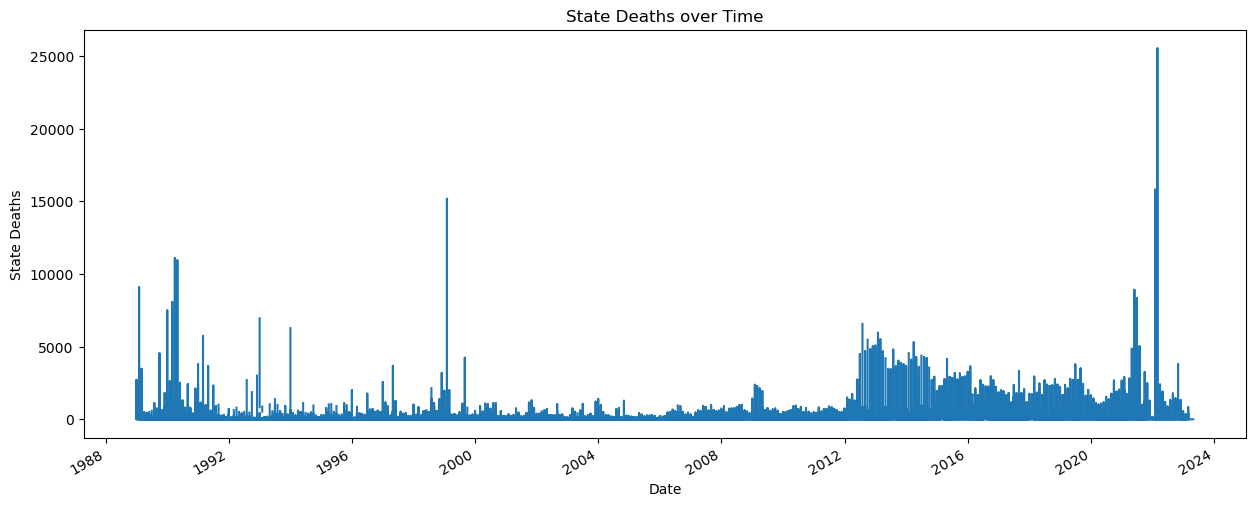

In [509]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
df_final.set_index('date')['state_deaths'].plot()
plt.title('State Deaths over Time')
plt.xlabel('Date')
plt.ylabel('State Deaths')
plt.show()


In [510]:

# merged_df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
# merged_df.set_index('date', inplace=True)

# # list of all countries
# countries = merged_df['country'].unique()

# # store the lagged features
# df_lagged = pd.DataFrame()

# # Loop over each country
# for country in countries:
#     df_country = df[df['country'] == country].copy()
#     df_country['deaths_lag'] = df_country['deaths'].shift(1) 
#     df_lagged = pd.concat([df_lagged, df_country])

# # Drop rows with missing values
# df_lagged.dropna(subset=['deaths_lag'], inplace=True)


In [511]:
df_final = df_final.sort_values(['year', 'month', 'isocode'])


In [512]:
# List of all event count columns for gov, opp and total events
event_cols = ['count_events_{}'.format(i) for i in range(1, 21)]
event_cols_gov = ['count_events_{}_gov'.format(i) for i in range(1, 21)]
event_cols_opp = ['count_events_{}_opp'.format(i) for i in range(1, 21)]

# Compute the total events for each group
df_final['total_events'] = df_final[event_cols].sum(axis=1)
df_final['total_events_gov'] = df_final[event_cols_gov].sum(axis=1)
df_final['total_events_opp'] = df_final[event_cols_opp].sum(axis=1)

# Compute the share of each type of event for each group and create new columns
for col in event_cols:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events']
    
for col in event_cols_gov:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events_gov']

for col in event_cols_opp:
    df_final['share_events_{}'.format(col)] = df_final[col] / df_final['total_events_opp']

# Drop the original count_events_* columns
df_final.drop(columns=event_cols + event_cols_gov + event_cols_opp, inplace=True)
df_final = df_final.fillna(0)



In [513]:
df_final.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'country', 'deaths',
       'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths',
       'date', 'total_events', 'total_events_gov', 'total_events_opp',
       'share_events_count_events_1', 'share_events_count_events_2',
       'share_events_count_events_3', 'share_events_count_events_4',
       'share_events_count_events_5', 'share_events_count_events_6',
       'share_events_count_events_7', 'share_events_count_events_8',
       'share_events_count_events_9', 'share_events_count_events_10',
       'share_events_count_events_11', 'share_events_count_events_12',
       'share_events_count_events_13', 'share_events_count_events_14',
       'share_events_count_events_15', 'share_events_count_events_16',
       'share_events_count_events_17', 'share_events_count_events_18',
       'share_events_count_events_19', 'share_events_count_events_20',
       'share_events_count_events_1_gov', 'share_events_count_events_2_gov',
  

In [514]:
df_final.reset_index(inplace=True)

In [515]:
# columns to drop
cols_to_drop = ['total_events', 'total_events_gov', 'total_events_opp',
                'nonstate_deaths', 'onesided_deaths', 'civilian_deaths', 'state_deaths', 'MonthYear', 'date', 'country']

# Drop the columns
df_final = df_final.drop(columns=cols_to_drop, axis=1)


In [516]:
df_final

,index,isocode,month,year,deaths,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,...,share_events_count_events_11_opp,share_events_count_events_12_opp,share_events_count_events_13_opp,share_events_count_events_14_opp,share_events_count_events_15_opp,share_events_count_events_16_opp,share_events_count_events_17_opp,share_events_count_events_18_opp,share_events_count_events_19_opp,share_events_count_events_20_opp
0,0,AFG,1,1989,693.0,0.079903,0.044275,0.058457,0.350052,0.045659,...,0.043269,0.096154,0.009615,0.000000,0.0,0.009615,0.000000,0.033654,0.182692,0.0
1,0,AGO,1,1989,249.0,0.074124,0.048518,0.102426,0.289757,0.163073,...,0.000000,0.000000,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.153846,0.0
2,0,ALB,1,1989,0.0,0.123077,0.084615,0.223077,0.369231,0.034615,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0,ARE,1,1989,0.0,0.116279,0.116279,0.186047,0.279070,0.023256,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0,ARG,1,1989,0.0,0.139847,0.034483,0.009579,0.191571,0.055556,...,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97833,412,XKX,5,2023,0.0,0.092308,0.076923,0.089231,0.307692,0.190769,...,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0
97834,412,YEM,5,2023,0.0,0.082192,0.046456,0.054199,0.406194,0.107802,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.021277,0.021277,0.042553,0.0
97835,412,ZAF,5,2023,0.0,0.151882,0.068819,0.066460,0.250162,0.075432,...,0.086614,0.047244,0.015748,0.062992,0.0,0.000000,0.023622,0.007874,0.047244,0.0
97836,412,ZMB,5,2023,0.0,0.146992,0.100533,0.067022,0.275704,0.142422,...,0.500000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [517]:
# Define conflict column
df_final['conflict'] = df_final['deaths'].apply(lambda x: 1 if x > 100 else 0)

# Drop rows with missing values
df_final = df_final.dropna()

# Train and test splits
train, test = train_test_split(df_final, test_size=0.2, shuffle=False)

# Separate target variable
y_train = train['conflict']
y_test = test['conflict']
train = train.drop(columns=['conflict'])
test = test.drop(columns=['conflict'])

# One-hot encoding for 'isocode' column
enc = OneHotEncoder(handle_unknown='ignore')

# Fit on train data
train_encoded = enc.fit_transform(train['isocode'].values.reshape(-1, 1)).toarray()
test_encoded = enc.transform(test['isocode'].values.reshape(-1, 1)).toarray()

# Get the list of unique categories from the encoder
categories = enc.categories_[0]

# Create DataFrame from encoded data, with original column names
dfOneHot_train = pd.DataFrame(train_encoded, columns = ["isocode_"+str(c) for c in categories])
dfOneHot_test = pd.DataFrame(test_encoded, columns = ["isocode_"+str(c) for c in categories])

# Reset index for concatenation
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# Concatenate the original dataframe and the one-hot encoded dataframe
train = pd.concat([train, dfOneHot_train], axis=1)
test = pd.concat([test, dfOneHot_test], axis=1)

In [518]:
# Create a list of columns to scale. Exclude the one-hot encoded columns, 'year', 'month', and 'conflict' 
scale_cols = [col for col in train.columns if 'isocode' not in col and col not in ['year', 'month', 'conflict', 'deaths']]

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler on the train data and transform both train and test data
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

Class imbalance.

In [519]:
# # pca on the features only
# pca = PCA(n_components=0.99)
# X_pca = pca.fit_transform(train)
# X_pca_test = pca.fit_transform(test)

# # explained variance ratios
# explained_variances = pca.explained_variance_ratio_

# # selected components
# component_names = ["PC" + str(i) for i in range(1, len(explained_variances)+1)]

# # DataFrame with the transformed data and original column names
# df_pca_train = pd.DataFrame(X_pca, columns=component_names)
# df_pca_test = pd.DataFrame(X_pca_test, columns=component_names)

# # indices for the target variable
# y_indices = y_train.index[:len(df_pca_train)]

# # target variable to the DataFrame
# df_pca_train['conflict'] = y_train.loc[y_indices].values


In [520]:
# df_pca_train

In [521]:
# turning them into numpy arrays to make them easier to work with
X_train = train.values
X_test = test.values
# Append y_train and y_test back to the datasets
train['conflict'] = y_train.values
test['conflict'] = y_test.values 
test.drop(['index'], axis=1, inplace=True)
train.drop(['index'], axis=1, inplace=True)

# Iterate over all test data

# here we grab the number of unique countries so that we know how many countries to expect at each 'batch', in this case, monthly sequence
n_countries = test['isocode'].nunique()
n_countries_train= train['isocode'].nunique()

train = train.sort_values(['year', 'month', 'isocode'])
test = test.sort_values(['year', 'month', 'isocode'])

train = train.drop(['isocode'], axis=1)
test = test.drop(['isocode'],axis=1)

In [522]:
def create_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw-1:i+tw,-1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

# sequence length of 3
sequence_length = 3

# Create sequences from the training data
train_sequences = create_sequences(train.values, sequence_length)

# Separate the sequences into X and y
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1][0] for seq in train_sequences]).flatten()  # Add flatten

# Reshape X to fit LSTM's expected input shape (batch_size, sequence_length, num_features)
X_train = X_train.reshape((-1, sequence_length, train.shape[1]))

# create sequences from the test data and prepare for LSTM
test_sequences = create_sequences(test.values, sequence_length)
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1][0] for seq in test_sequences]).flatten()  # Add flatten
X_test = X_test.reshape((-1, sequence_length, test.shape[1]))

model = Sequential()
model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2])))  # Single LSTM layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

progbar_logger = ProgbarLogger()

In [523]:
y_train = pd.Series(y_train)
count_class_0_train, count_class_1_train = y_train.value_counts()
total_samples_train = len(y_train)

# class weights for training data
weight_for_class_0_train = (1 / count_class_0_train) * (total_samples_train) / 2.0 
weight_for_class_1_train = (1 / count_class_1_train) * (total_samples_train) / 2.0

class_weight_train = {0: weight_for_class_0_train, 1: weight_for_class_1_train}

Epoch 1/10


2023-06-19 12:48:25.555513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-19 12:48:25.790821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-19 12:48:26.005060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-19 12:48:44.440574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-19 12:48:44.505705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1957/1957 - 22s - loss: 0.6140 - accuracy: 0.6273 - val_loss: 0.5931 - val_accuracy: 0.9655 - 22s/epoch - 11ms/sample
Epoch 2/10
1957/1957 - 20s - loss: 0.5757 - accuracy: 0.6512 - val_loss: 0.5941 - val_accuracy: 0.9623 - 20s/epoch - 10ms/sample
Epoch 3/10
1957/1957 - 19s - loss: 0.5687 - accuracy: 0.6330 - val_loss: 0.5648 - val_accuracy: 0.9675 - 19s/epoch - 10ms/sample
Epoch 4/10
1957/1957 - 19s - loss: 0.4923 - accuracy: 0.7898 - val_loss: 0.4724 - val_accuracy: 0.9789 - 19s/epoch - 10ms/sample
Epoch 5/10
1957/1957 - 19s - loss: 0.5072 - accuracy: 0.7435 - val_loss: 0.5851 - val_accuracy: 0.9640 - 19s/epoch - 10ms/sample
Epoch 6/10
1957/1957 - 20s - loss: 0.5193 - accuracy: 0.7060 - val_loss: 0.5832 - val_accuracy: 0.9650 - 20s/epoch - 10ms/sample
Epoch 7/10
1957/1957 - 19s - loss: 0.5111 - accuracy: 0.7685 - val_loss: 0.5809 - val_accuracy: 0.9738 - 19s/epoch - 10ms/sample
Epoch 8/10
1957/1957 - 19s - loss: 0.5417 - accuracy: 0.7494 - val_loss: 0.6075 - val_accuracy: 0.9661 - 19s

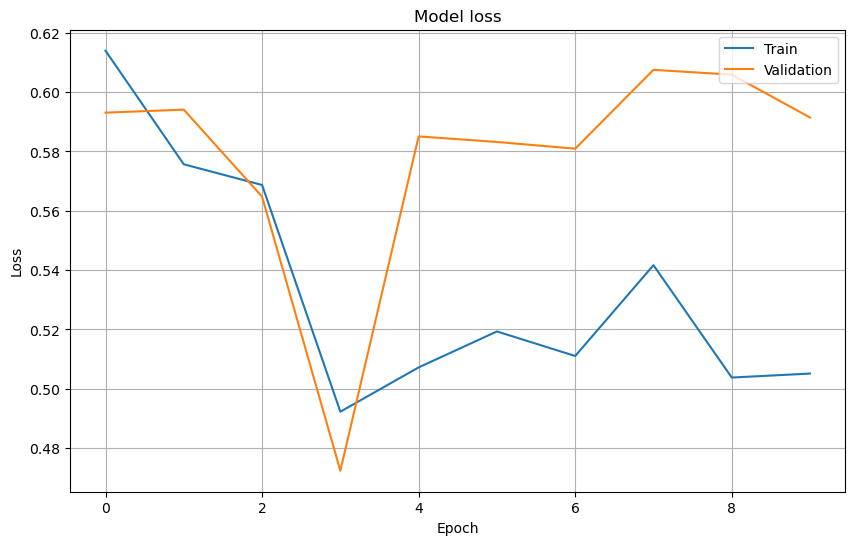

In [524]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2, class_weight=class_weight_train, callbacks=[progbar_logger], shuffle = False)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


In [525]:
class_weight_train

{0: 0.5164502335893578, 1: 15.697352587244284}

In [526]:
lstm_predictions = model.predict(X_test)

  1/612 [..............................] - ETA: 2:44

2023-06-19 12:51:44.574386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-19 12:51:44.641344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


612/612 [==============================] - 2s 3ms/step


In [527]:
lstm_predictions

array([[0.44201633],
       [0.44201633],
       [0.44201633],
       ...,
       [0.44201633],
       [0.44201633],
       [0.44201633]], dtype=float32)

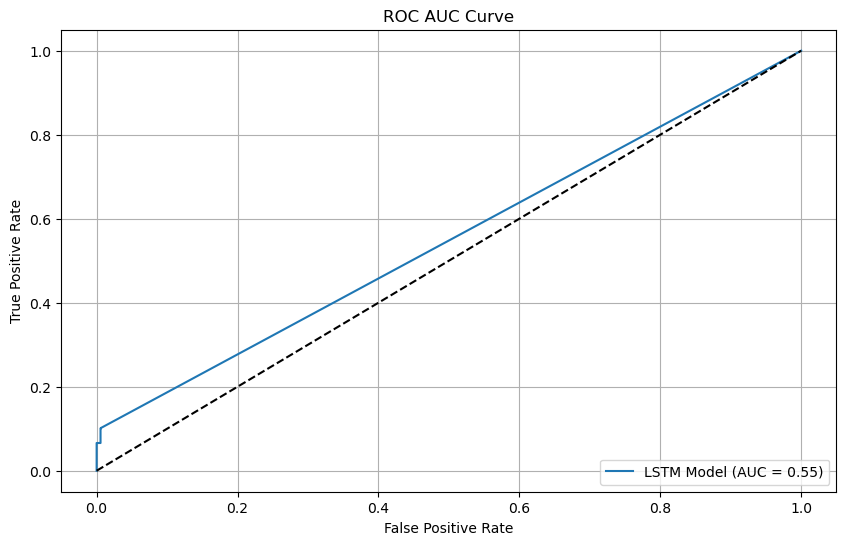

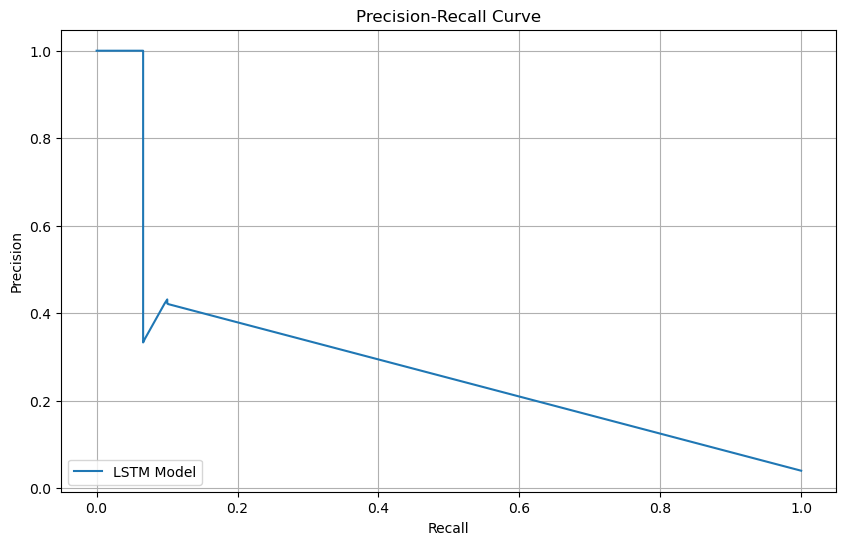

In [528]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

y_true = y_test.flatten() 
y_pred = lstm_predictions.flatten() 

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot ROC AUC curve
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='LSTM Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='LSTM Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [529]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))


print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


roc_auc_minority = roc_auc_score(y_test == 1, y_pred)
print("\nROC AUC for minority class:", roc_auc_minority)


612/612 [==============================] - 2s 3ms/step
Confusion Matrix:
 [[18777     0]
 [  736    52]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18777
         1.0       1.00      0.07      0.12       788

    accuracy                           0.96     19565
   macro avg       0.98      0.53      0.55     19565
weighted avg       0.96      0.96      0.95     19565


ROC AUC for minority class: 0.5479325338348651


This makes no sense to me, basically we cannot predict any in conflict right now.